# 3. Import libraries

- Import libraries
- Creation of array and extraction of some elements of this array
- Multiplication of the extracted elements by a factor 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq


# Création d'un tableau de 20 nombres, de 0 à 20
max_nbr = 21
array = np.arange(0, max_nbr)  

# Extraction des nombres de 5 à 15
m, n = 5, 15  
sub_array = array[m:n]  #Extraction des éléments 5 à 15 du tableau

# Multiplication des éléments sélectionnés par 2
factor = 2
scaled_array = sub_array * factor  # Multiply each element by 2

# Prints
print("Original array:", array)
print(f"Extracted sub-array (array[{m}:{n}]):", sub_array)
print("Scaled sub-array:", scaled_array)


Original array: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Extracted sub-array (array[5:15]): [ 5  6  7  8  9 10 11 12 13 14]
Scaled sub-array: [10 12 14 16 18 20 22 24 26 28]


# 5. Mean values

- Find a way to filter something by the way of mean values. The idea is to split the input signal
into small parts and compute a mean for each of these parts. 
- In a second step, compute the mean by sliding over the sample.
- Use a sample as generated above, with some noise and periodic signals. Take care to avec
several periods of the signal.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Fonction permettant le calcul de la moyenne des échantillons de chaque segment
def compute_mean(values):
    return np.mean(values)

# Segmentation du signal d'entrée
m, n = 5, 15  
seg1 = array[m:n]  
seg2 = array[m:n]
seg3 = array[m:n]
seg4 = array[m:n]

# Creation d'un tableau de 10 valeurs aléatoires (entre 0 et 10) et calcul de la moyenne de ces valeurs
values = np.random.randint(0,10,size=(1, 10))
mean = compute_mean(values)

# Prints
print("Array of values : ", values)
print("Mean of array : ", mean)

Array of values :  [[9 1 7 5 2 5 8 6 5 6]]
Mean of array :  5.4


# 4. Generate signals for testing purpose

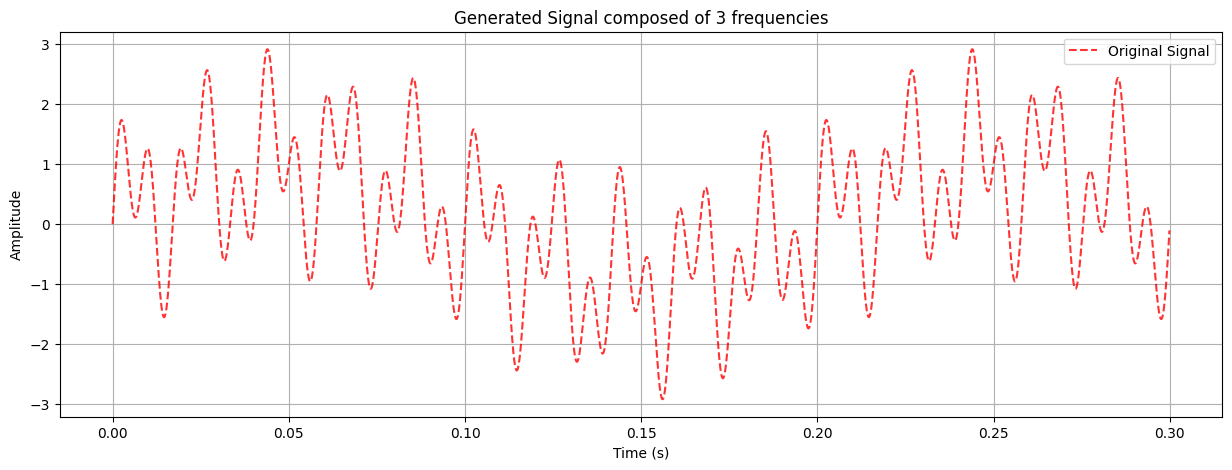

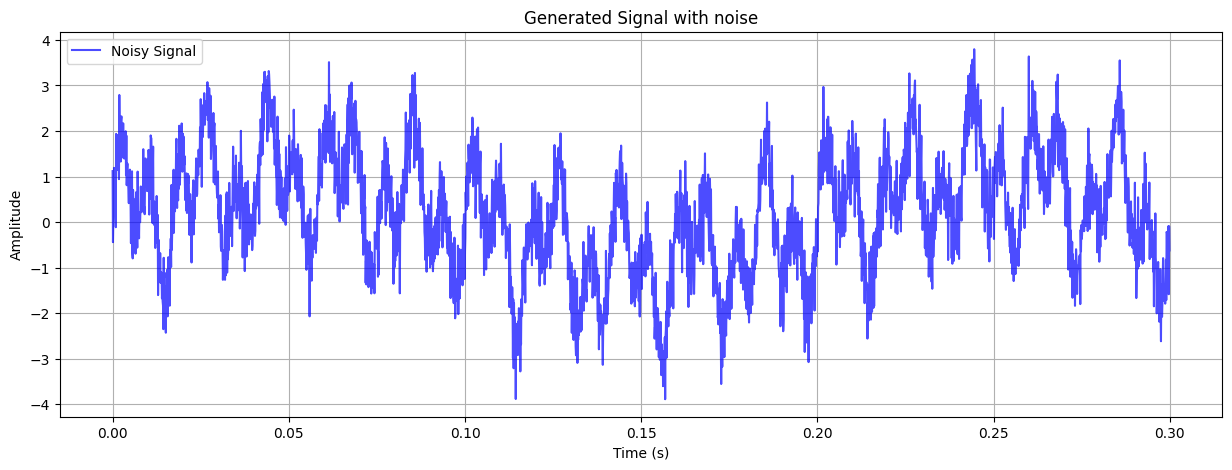

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a time vector
sampling_rate = 10000  # Samples per second
T = 0.3  # Duration in seconds
t = np.arange(0, T, 1/sampling_rate)  # Time vector

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise

# Step 5: Plot the resulting signal
plt.figure(figsize=(15, 5))
#plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)
plt.plot(t, signal, label='Original Signal', color='r', linestyle='dashed', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal composed of 3 frequencies')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)
#plt.plot(t, signal, label='Original Signal', color='r', linestyle='dashed', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal with noise')
plt.legend()
plt.grid(True)
plt.show()

- Write a function that, for each part of the generated sample, computes the mean
and plot the result

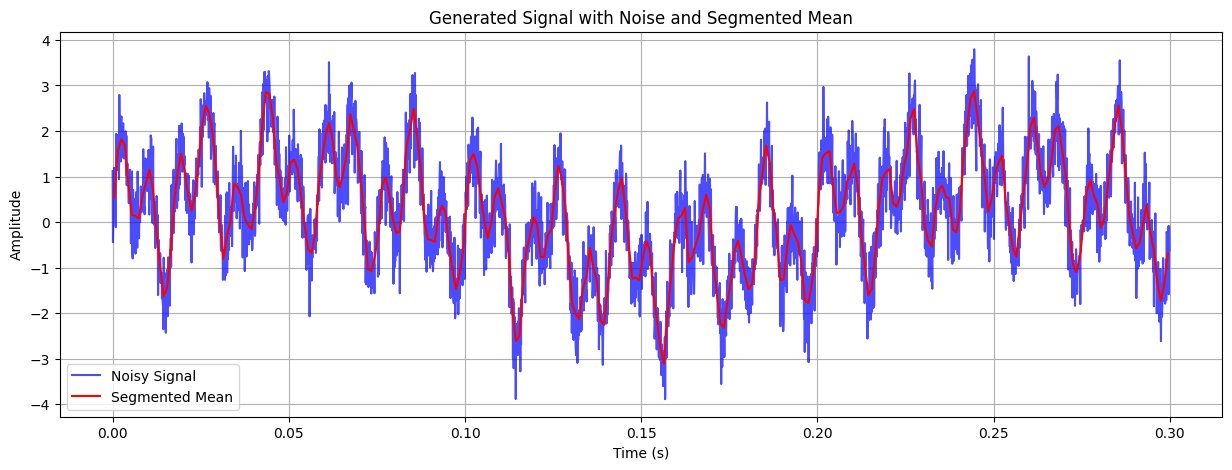

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction permettant de calculer la moyenne d'un segment
def compute_mean(segment):
    return np.mean(segment)

# Fonction permettant de calculer et d'afficher la moyenne des différents segments du signal
def segmented_mean(sample, t, segment_size):
    # Calcul de la moyenne des segments
    means = [compute_mean(sample[i:i+segment_size]) for i in range(0, len(sample), segment_size)]
    
    # Calcul des positions temporelles pour chaque segment
    x_positions = [np.mean(t[i:i+segment_size]) for i in range(0, len(sample), segment_size)]
    
    # Retourner les moyennes et les positions pour les tracer sur le même graphique
    return x_positions, means

# Calcul de la moyenne des segments du signal bruité
segment_size = 10
x_positions, means = segmented_mean(noisy_signal, t, segment_size)

# Tracer les deux courbes sur le même graphique
plt.figure(figsize=(15, 5))

# Tracer le signal bruité
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)

# Tracer la moyenne des segments
plt.plot(x_positions, means,  linestyle='-', label='Segmented Mean', color='r')

# Ajouter des labels, un titre et une légende
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal with Noise and Segmented Mean')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


- Write a function that slides over the original sample to have almost the same number
of points as the original sample. Plot the result : the original sample and the
processed one. Try to adjust x position of the processed signal

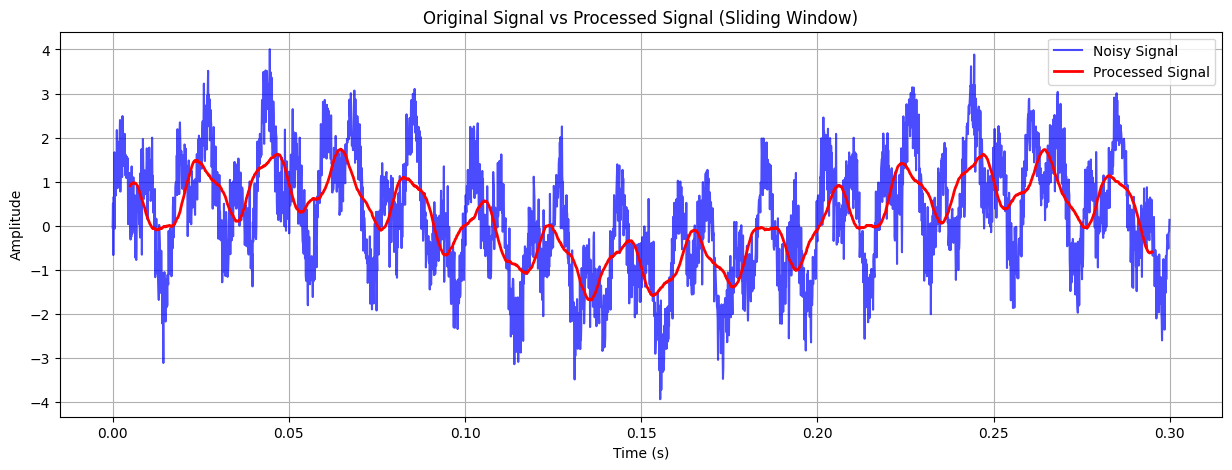

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a time vector
sampling_rate = 10000  # Samples per second
T = 0.3  # Duration in seconds
t = np.arange(0, T, 1/sampling_rate)  # Time vector

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise


# Function to apply a sliding window on the signal and return a processed signal
def sliding_window_process(sample, window_size, t):
    processed_signal = []
    
    # Slide the window over the sample signal
    for i in range(len(sample) - window_size + 1):
        # Extract the segment
        segment = sample[i:i + window_size]
        # Compute the mean of the segment
        mean_value = np.mean(segment)
        processed_signal.append(mean_value)
    
    # Adjust the time to match the processed signal (use the center of the window)
    processed_time = t[window_size//2 : len(processed_signal) + window_size//2]  # Ensure size match
    
    return processed_signal, processed_time

# Define the window size for the sliding window approach
window_size = 100

# Process the signal using the sliding window method
processed_signal, processed_time = sliding_window_process(noisy_signal, window_size, t)

# Plot the original noisy signal and the processed signal
plt.figure(figsize=(15, 5))

# Plot the original noisy signal
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)

# Plot the processed signal with the adjusted time
plt.plot(processed_time, processed_signal, label='Processed Signal', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal vs Processed Signal (Sliding Window)')
plt.legend()
plt.grid(True)
plt.show()


- Modify your original signal so that it has a periodic component that matches exactly
the size of the mean. Observe the results.

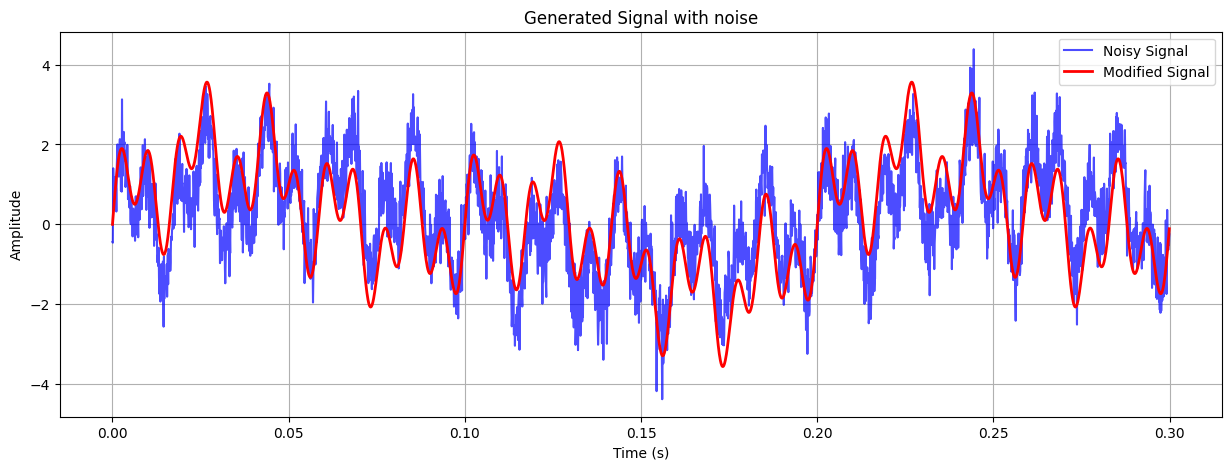

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a time vector
sampling_rate = 10000  # Samples per second
T = 0.3  # Duration in seconds
t = np.arange(0, T, 1/sampling_rate)  # Time vector

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz
freq4 = 10

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise

# Calcul de la moyenne des segments du signal bruité
segment_size = 10
x_positions, means = segmented_mean(noisy_signal, t, segment_size)


# Add a periodic component 
# This periodic signal is created to exactly match the segment size
periodic_signal = np.sin(2 * np.pi * freq4 * t)

# Modify the original signal to include this periodic component
modified_signal = signal + periodic_signal

plt.figure(figsize=(15, 5))
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)
plt.plot(t, modified_signal, label='Modified Signal', color='r', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal with noise')
plt.legend()
plt.grid(True)
plt.show()


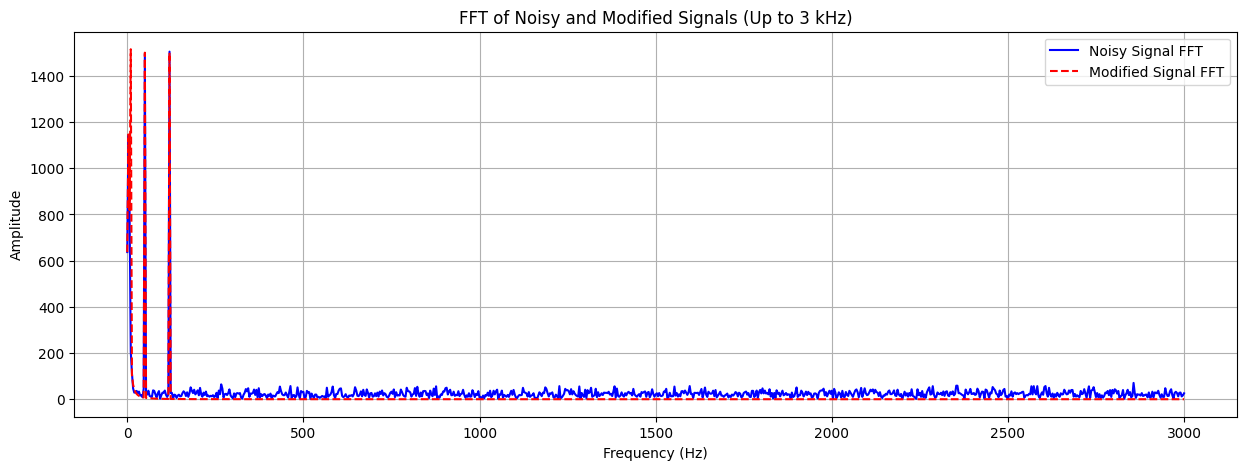

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a time vector
sampling_rate = 10000  # Samples per second
T = 0.3  # Duration in seconds
t = np.arange(0, T, 1/sampling_rate)  # Time vector

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz
freq4 = 10  # Frequency of the periodic signal

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise

# Add a periodic component
periodic_signal = np.sin(2 * np.pi * freq4 * t)

# Modify the original signal to include this periodic component
modified_signal = signal + periodic_signal

# Compute the FFT of the noisy signal and the modified signal
noisy_signal_fft = np.fft.fft(noisy_signal)
modified_signal_fft = np.fft.fft(modified_signal)

# Frequency axis for plotting the FFT results
frequencies = np.fft.fftfreq(len(t), 1/sampling_rate)

# Take only the positive half of the frequencies and corresponding FFT values
positive_freqs = frequencies[:len(frequencies)//2]
noisy_signal_fft_amplitude = np.abs(noisy_signal_fft)[:len(frequencies)//2]
modified_signal_fft_amplitude = np.abs(modified_signal_fft)[:len(frequencies)//2]

# Filter frequencies to only include up to 3 kHz
max_freq = 3000  # 3 kHz

# Find the index where the frequency exceeds 3 kHz
freq_index = np.where(positive_freqs > max_freq)[0][0]

# Subset the data to only keep frequencies up to 3 kHz
positive_freqs_filtered = positive_freqs[:freq_index]
noisy_signal_fft_amplitude_filtered = noisy_signal_fft_amplitude[:freq_index]
modified_signal_fft_amplitude_filtered = modified_signal_fft_amplitude[:freq_index]

# Plot the FFT magnitudes of both signals up to 3 kHz
plt.figure(figsize=(15, 5))
plt.plot(positive_freqs_filtered, noisy_signal_fft_amplitude_filtered, label='Noisy Signal FFT', color='b')
plt.plot(positive_freqs_filtered, modified_signal_fft_amplitude_filtered, label='Modified Signal FFT', color='r', linestyle='dashed')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Noisy and Modified Signals (Up to 3 kHz)')
plt.legend()
plt.grid(True)
plt.show()
